# Home App 
## Part I - Predict the log error based on three simple features

The data for this project comes from Kaggle  [Zillow Prize: Zillow’s Home Value Prediction (Zestimate)](https://www.kaggle.com/c/zillow-prize-1/data). The list of variables is shown below, but we will only use three of them for this part of the project.  

The variables:

* **airconditioningtypeid** : Type of cooling system present in the home (if any)
* **architecturalstyletypeid** : Architectural style of the home (i.e. ranch, colonial, split-level, etc…)
* **basementsqft** : Finished living area below or partially below ground level
* **bathroomcnt** : Number of bathrooms in home including fractional bathrooms
* **bedroomcnt** : Number of bedrooms in home 
* **buildingqualitytypeid** : Overall assessment of condition of the building from best (lowest) to worst (highest)
* **buildingclasstypeid** : The building framing type (steel frame, wood frame, concrete/brick) 
* **calculatedbathnbr** : Number of bathrooms in home including fractional bathroom
* **decktypeid** : Type of deck (if any) present on parcel
* **threequarterbathnbr** : Number of 3/4 bathrooms in house (shower + sink + toilet)
* **finishedfloor1squarefeet** : Size of the finished living area on the first (entry) floor of the home
* **calculatedfinishedsquarefeet** : Calculated total finished living area of the home 
* **finishedsquarefeet6** : Base unfinished and finished area
* **finishedsquarefeet12** : Finished living area
* **finishedsquarefeet13** : Perimeter  living area
* **finishedsquarefeet15** : Total area
* **finishedsquarefeet50** : Size of the finished living area on the first (entry) floor of the home
* **fips** : Federal Information Processing Standard code -  see https://en.wikipedia.org/wiki/FIPS_county_code for more details
* **fireplacecnt** : Number of fireplaces in a home (if any)
* **fireplaceflag** : Is a fireplace present in this home 
* **fullbathcnt** : Number of full bathrooms (sink, shower + bathtub, and toilet) present in home
* **garagecarcnt** : Total number of garages on the lot including an attached garage
* **garagetotalsqft** : Total number of square feet of all garages on lot including an attached garage
* **hashottuborspa** : Does the home have a hot tub or spa
* **heatingorsystemtypeid** : Type of home heating system
* **latitude** : Latitude of the middle of the parcel multiplied by 10e6
* **longitude** : Longitude of the middle of the parcel multiplied by 10e6
* **lotsizesquarefeet** : Area of the lot in square feet
* **numberofstories** : Number of stories or levels the home has
* **parcelid** : Unique identifier for parcels (lots) 
* **poolcnt** : Number of pools on the lot (if any)
* **poolsizesum** : Total square footage of all pools on property
* **pooltypeid10** : Spa or Hot Tub
* **pooltypeid2** : Pool with Spa/Hot Tub
* **pooltypeid7** : Pool without hot tub
* **propertycountylandusecode** : County land use code i.e. it's zoning at the county level
* **propertylandusetypeid** : Type of land use the property is zoned for
* **propertyzoningdesc** : Description of the allowed land uses (zoning) for that property
* **rawcensustractandblock** : Census tract and block ID combined - also contains blockgroup assignment by extension
* **censustractandblock** : Census tract and block ID combined - also contains blockgroup assignment by extension
* **regionidcounty** : County in which the property is located
* **regionidcity** : City in which the property is located (if any)
* **regionidzip** : Zip code in which the property is located
* **regionidneighborhood** : Neighborhood in which the property is located
* **roomcnt** : Total number of rooms in the principal residence
* **storytypeid** : Type of floors in a multi-story house (i.e. basement and main level, split-level, attic, etc.).  See tab for details.
* **typeconstructiontypeid** : What type of construction material was used to construct the home
* **unitcnt** : Number of units the structure is built into (i.e. 2 = duplex, 3 = triplex, etc...)
* **yardbuildingsqft17** : Patio in  yard
* **yardbuildingsqft26** : Storage shed/building in yard
* **yearbuilt** : The Year the principal residence was built 
* **taxvaluedollarcnt** : The total tax assessed value of the parcel
* **structuretaxvaluedollarcnt** : The assessed value of the built structure on the parcel
* **landtaxvaluedollarcnt** : The assessed value of the land area of the parcel
* **taxamount** : The total property tax assessed for that assessment year
* **assessmentyear** : The year of the property tax assessment 
* **taxdelinquencyflag** : Property taxes for this parcel are past due as of 2015
* **taxdelinquencyyear** : Year for which the unpaid propert taxes were due 



For part I of the project, we will: 

1. Read the documentation and familiarize yourself with the dataset. 
2. Combine all of the data files into one large dataset. 
3. Split the data into training/validation/test sets. 
4. Perform data visualization to examine the features. 
5. Train a model with the supervised ML method with lowest mean square error. 
6. Perform parameter tuning to acquire a model with better performance. 
 


### I. Load and Merge Data

In [107]:
# load necessary packages 
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
import numpy as np
import glob
import itertools
import seaborn as sns
from scipy import stats
from time import time

import os
import tensorflow as tf
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

# pretty display for notebooks
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout, BatchNormalization
from keras.layers.advanced_activations import PReLU
from keras.layers.noise import GaussianDropout
from keras.optimizers import Adam
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Imputer

from IPython.display import display # Allows the use of display() for DataFrames

# hide warnings
import warnings
warnings.filterwarnings('ignore')
from IPython.display import display, HTML
pd.set_option('display.max_colwidth', -1)

listOfFiles = glob.glob("../data/*.csv")
listOfFiles

# Load and merge the housing data
try:
    df1 = pd.read_csv(listOfFiles[0], low_memory = False)
    df2 = pd.read_csv(listOfFiles[1], low_memory = False)
    df = df1.merge(df2, on= 'parcelid', how = 'inner')
    ##train_data.dropna(how="all", inplace=True) #remove trailing line with empty row
    ##train_data = train_data[:-1]
    print("Main dataset has {} samples with {} features each.".format(*df.shape))
except:
    print("Dataset could not be loaded. Is the dataset missing?")

Main dataset has 77613 samples with 60 features each.


The properties_2017.csv file contains details on the properties, and the train_2017.csv provides the actual log error for training purpose. Therefore, the goal here is to predict the log error using the properties of the houses. There are 58 properties, so we should perform some dimension reduction first. 

However, for the purpose of initial test, a smaller model will be built using only bedroomcnt, bathroomcnt, and calculatedfinishedsquarefeet.

### II. Data Exploration 

In [108]:
# reset index to sku
data_id = df['parcelid']
df = df.set_index('parcelid')
print ('Table 2.1: Sample Data from main dataset')
df.head(3)

Table 2.1: Sample Data from main dataset


,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,...,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,logerror,transactiondate
parcelid,,,,,,,,,,,,,,,,,,,,,
17054981,NaN,NaN,NaN,5.0,4.0,NaN,NaN,5.0,NaN,1968.0,...,501928.0,872850.0,2016.0,370922.0,9673.46,NaN,NaN,6.111001e+13,-0.013099,2017-06-15
17055743,NaN,NaN,NaN,2.0,3.0,NaN,NaN,2.0,66.0,1444.0,...,130845.0,436157.0,2016.0,305312.0,5538.80,NaN,NaN,6.111001e+13,0.073985,2017-07-26
17068109,NaN,NaN,NaN,1.5,3.0,NaN,NaN,1.5,66.0,1698.0,...,193413.0,286606.0,2016.0,93193.0,2987.36,NaN,NaN,6.111001e+13,0.071886,2017-07-28


In [109]:
print('Number of features:', df.shape[1])
train = df.select_dtypes(exclude=['object'])
print("")
print('Number of Numerical Features:', train.shape[1])
train.fillna(0,inplace=True)

print("")
print("List of features contained our dataset:",list(df.columns))
%matplotlib inline

Number of features: 59

Number of Numerical Features: 53

List of features contained our dataset: ['airconditioningtypeid', 'architecturalstyletypeid', 'basementsqft', 'bathroomcnt', 'bedroomcnt', 'buildingclasstypeid', 'buildingqualitytypeid', 'calculatedbathnbr', 'decktypeid', 'finishedfloor1squarefeet', 'calculatedfinishedsquarefeet', 'finishedsquarefeet12', 'finishedsquarefeet13', 'finishedsquarefeet15', 'finishedsquarefeet50', 'finishedsquarefeet6', 'fips', 'fireplacecnt', 'fullbathcnt', 'garagecarcnt', 'garagetotalsqft', 'hashottuborspa', 'heatingorsystemtypeid', 'latitude', 'longitude', 'lotsizesquarefeet', 'poolcnt', 'poolsizesum', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7', 'propertycountylandusecode', 'propertylandusetypeid', 'propertyzoningdesc', 'rawcensustractandblock', 'regionidcity', 'regionidcounty', 'regionidneighborhood', 'regionidzip', 'roomcnt', 'storytypeid', 'threequarterbathnbr', 'typeconstructiontypeid', 'unitcnt', 'yardbuildingsqft17', 'yardbuildingsqft26', '

#### Check missing values

We can see that a lot of these variables contain many missing values. We will either perform permutation and consider whether using that many variables in our model is advantageous.  

In [110]:
# calculate % of missing value
total = df.isnull().sum().sort_values(ascending=False)
percent = (100*df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print('Table x Number of Missing Data for each Feature (Not used in doc)')
missing_data

Table x Number of Missing Data for each Feature (Not used in doc)


,Total,Percent
buildingclasstypeid,77598,99.980673
finishedsquarefeet13,77571,99.945885
basementsqft,77563,99.935578
storytypeid,77563,99.935578
yardbuildingsqft26,77543,99.909809
fireplaceflag,77441,99.778388
architecturalstyletypeid,77406,99.733292
typeconstructiontypeid,77390,99.712677
finishedsquarefeet6,77227,99.502661
pooltypeid10,77148,99.400874


### Train/Test data Split

In [111]:
# select certain columns for smaller model
data = df[['bedroomcnt', 'bathroomcnt', 'calculatedfinishedsquarefeet', 'logerror']]
data = data.dropna()
print(data.head())

# Scale data
scaler = MinMaxScaler()
X = scaler.fit_transform(data[['bedroomcnt', 'bathroomcnt', 'calculatedfinishedsquarefeet']])
X = pd.DataFrame(X)
X.columns = [['bedroomcnt', 'bathroomcnt', 'calculatedfinishedsquarefeet']]
X['parcelid'] = data_id
X = X.set_index('parcelid')

# Train and Test 
Y = data[['logerror']]

# split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state = 42)
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.5, random_state = 42)

          bedroomcnt  bathroomcnt  calculatedfinishedsquarefeet  logerror
parcelid                                                                 
17054981  4.0         5.0          3760.0                       -0.013099
17055743  3.0         2.0          1444.0                        0.073985
17068109  3.0         1.5          1698.0                        0.071886
17073952  2.0         2.0          986.0                         0.305680
17078502  2.0         1.0          1170.0                       -0.073787


In [112]:
# Get data characteristics on the training set
n_train = round(len(x_train), 0)
n_val = round(len(x_val), 0)
n_test = round(len(x_test),1)

y_train_mean = y_train.mean()[0]
y_val_mean = y_val.mean()[0]
y_test_mean = y_test.mean()[0]

basic_df = pd.DataFrame([['{:.0f}'.format(n_train), '{:.0f}'.format(n_val), '{:.0f}'.format(n_test)], 
                         ['{:.4f}'.format(y_train_mean), '{:.4f}'.format(y_val_mean), '{:.4f}'.format(y_test_mean)]], 
                        index=['Sample Size', 'log error'], 
                        columns=['Training Set', 'validation Set', 'Test Set'])
print('Table 2.2: Characteristics of Training, Validation, and Test Set')
basic_df

Table 2.2: Characteristics of Training, Validation, and Test Set


,Training Set,validation Set,Test Set
Sample Size,54164,11607,11607
log error,0.0167,0.0167,0.0166


In [113]:
#Display a description of the dataset
print('Table 2.3: Summary Statistics on Numerical Data')
display(data.describe())

Table 2.3: Summary Statistics on Numerical Data


,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,logerror
count,77378.000000,77378.000000,77378.000000,77378.000000
mean,3.060844,2.304195,1784.935421,0.016681
std,1.131742,0.991364,954.250373,0.169954
min,0.000000,0.000000,128.000000,-4.655420
25%,2.000000,2.000000,1182.000000,-0.024285
50%,3.000000,2.000000,1542.000000,0.006661
75%,4.000000,3.000000,2112.000000,0.039213
max,16.000000,18.000000,35640.000000,5.262999


Nothing looks odd from the result. It looks like there are 3 bedrooms and 2 bathrooms with 1784 square feet in a house, on average. There doesn't seen to be any missing data that we need to fix as we've only selected data without missing values for our model. 

#### Exploratory Visualization

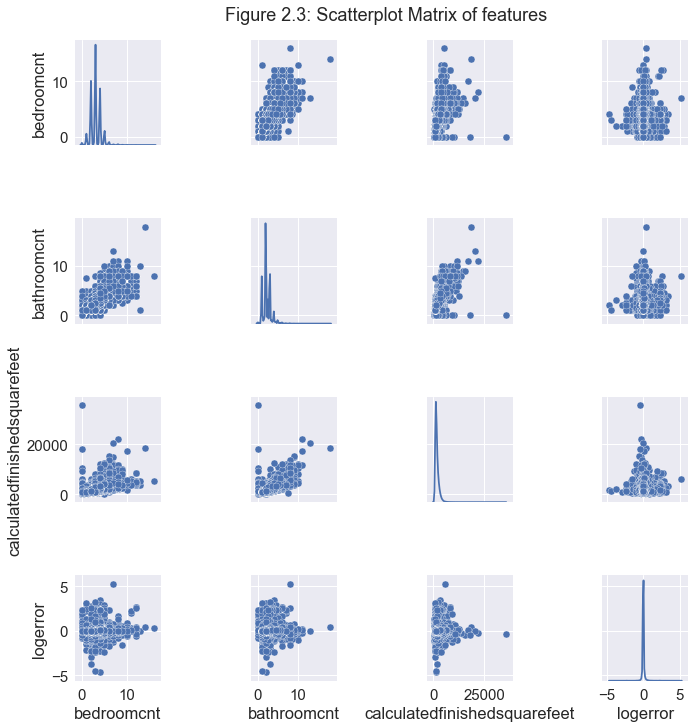

In [114]:
# Produce a scatter matrix for each pair of features in the data
#sample = train_data.sample(frac=0.005, replace=True)
sns.set(font_scale=1.5)
grid= sns.pairplot(data, diag_kind="kde")
# tital above plot
grid.fig.text(0.33, 1.0,'Figure 2.3: Scatterplot Matrix of features', fontsize=18)
plt.xticks(fontsize = 25, fontweight = 'bold')
plt.tight_layout()
##plt.savefig('plots/f3.png')

We can see that the three features are all skewed to the left, so it makes sense for us to use MinMaxScaler to standardize these features before modeling. 

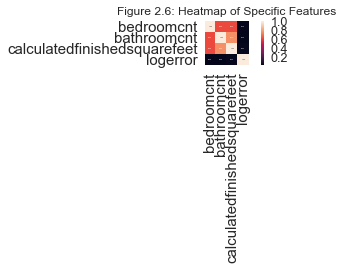

In [115]:
#saleprice correlation matrix
k = 9 #number of variables for heatmap
cols = data.columns[0:4]
plt.title('Figure 2.6: Heatmap of Specific Features', size = 12)
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 2}, yticklabels=cols.values, xticklabels=cols.values)
plt.tight_layout()
plt.xticks(rotation=90);
#plt.savefig('plots/f6.jpeg')

### Modeling 

In [116]:
import xgboost

from sklearn import cross_validation
from sklearn import metrics
from sklearn.grid_search import GridSearchCV
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor

#create classifiers
xgbrg= XGBRegressor(objective="reg:linear", random_state=100) 
gbrg = GradientBoostingRegressor(random_state=100) 
rfrg = RandomForestRegressor(random_state=100) 
dtrg = DecisionTreeRegressor(random_state=100) 
abrg = AdaBoostRegressor(random_state=100) 
brg = BaggingRegressor(random_state=100)

# train classifiers
xgbrg.fit(x_train, y_train, eval_metric = 'rmse', verbose = False, eval_set = [(x_test, y_test)])
gbrg.fit(x_train, y_train)
rfrg.fit(x_train, y_train)
dtrg.fit(x_train, y_train)
abrg.fit(x_train, y_train)
brg.fit(x_train, y_train)

# obtain predictions
xgbpreds = xgbrg.predict(x_val)
gbpreds = gbrg.predict(x_val)
rfpreds = rfrg.predict(x_val)
dtpreds = dtrg.predict(x_val)
abpreds = abrg.predict(x_val)
bpreds = brg.predict(x_val)

print('\nXGB Mean Square error ', mean_squared_error(y_val,xgbpreds))
print('GradientBoosting Mean Square error" ', mean_squared_error(y_val,gbpreds))
print('RandomForest Mean Square error" ', mean_squared_error(y_val,rfpreds))
print('DecisionTree Mean Square error" ', mean_squared_error(y_val,dtpreds))
print('AdaBoost Mean Square error" ', mean_squared_error(y_val,abpreds))
print('Bagging Mean Square error" ', mean_squared_error(y_val,bpreds))


XGB Mean Square error  0.030259832286593985
GradientBoosting Mean Square error"  0.03023401826953076
RandomForest Mean Square error"  0.038341362994674694
DecisionTree Mean Square error"  0.043566076641163846
AdaBoost Mean Square error"  0.03708437435507253
Bagging Mean Square error"  0.03831784306873772


We can see that gradient boosting performs the best, but we will actually choose XGB model for its known superiority in terms of training speed. We will now perform model tuning on XGB model. 

In [140]:
#Import libraries:
import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Perforing grid search
from sklearn.metrics import cohen_kappa_score, make_scorer, precision_score, recall_score
from sklearn.grid_search import GridSearchCV
from sklearn.svm import LinearSVC

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams

scoring_function = make_scorer(mean_squared_error, greater_is_better=False)
target = 'logerror'
predictors = df_train.columns[0:3]

In [240]:
def modelfit(alg, dtrain, predictors, useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='rmse', early_stopping_rounds=early_stopping_rounds, verbose_eval= True)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['logerror'],eval_metric='rmse')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
     
    #Print model report:
    print("\nModel Report")
    print("Mean Square error : %.4g" % metrics.mean_squared_error(dtrain['logerror'].values, dtrain_predictions))
    print("r2 Score : %.4g" % metrics.r2_score(dtrain['logerror'].values, dtrain_predictions))
    return dtrain_predictions

In [241]:
#combine x_train and y_train for model tuning 
df_train = pd.concat([x_train.reset_index(drop=True), y_train.reset_index(drop=True)], axis=1)

# get a benchmark performance with our initial values
xgb1 = XGBRegressor(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'reg:linear',
 nthread=4,
 scale_pos_weight=1,
 seed=100)

m1pred = modelfit(xgb1, df_train, predictors);

[0]	train-rmse:0.466299+0.000535207	test-rmse:0.466352+0.00217665
[1]	train-rmse:0.425944+0.000524273	test-rmse:0.426063+0.00229778
[2]	train-rmse:0.390201+0.000549955	test-rmse:0.390405+0.0024069
[3]	train-rmse:0.358616+0.000573864	test-rmse:0.358909+0.00253462
[4]	train-rmse:0.330805+0.000580653	test-rmse:0.331166+0.00264102
[5]	train-rmse:0.306469+0.000611781	test-rmse:0.306933+0.00276374
[6]	train-rmse:0.285153+0.000659289	test-rmse:0.285713+0.0028347
[7]	train-rmse:0.266676+0.000655408	test-rmse:0.267346+0.00296469
[8]	train-rmse:0.250703+0.000700385	test-rmse:0.251521+0.00306519
[9]	train-rmse:0.236964+0.000728331	test-rmse:0.237903+0.00316359
[10]	train-rmse:0.225187+0.000706632	test-rmse:0.226279+0.00326626
[11]	train-rmse:0.215182+0.000769291	test-rmse:0.216384+0.00328692
[12]	train-rmse:0.206718+0.000791104	test-rmse:0.208044+0.00335388
[13]	train-rmse:0.199605+0.000846161	test-rmse:0.201073+0.00340359
[14]	train-rmse:0.193626+0.000868826	test-rmse:0.195215+0.00345915
[15]	tr

In [242]:
param_test1 = {
 'max_depth':[3, 5, 7, 9],
 'min_child_weight':[1, 3, 5]
}
gsearch1 = GridSearchCV(estimator = XGBRegressor( learning_rate =0.1, n_estimators=102, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'reg:linear', nthread=4, scale_pos_weight=1, seed=100), 
 param_grid = param_test1,n_jobs=4,iid=False, cv=5)
gsearch1.fit(df_train[predictors],df_train[target])
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

([mean: 0.00569, std: 0.00884, params: {'max_depth': 3, 'min_child_weight': 1},
  mean: 0.00753, std: 0.01079, params: {'max_depth': 3, 'min_child_weight': 3},
  mean: 0.00741, std: 0.00914, params: {'max_depth': 3, 'min_child_weight': 5},
  mean: 0.00217, std: 0.01033, params: {'max_depth': 5, 'min_child_weight': 1},
  mean: 0.00569, std: 0.01259, params: {'max_depth': 5, 'min_child_weight': 3},
  mean: 0.00541, std: 0.00989, params: {'max_depth': 5, 'min_child_weight': 5},
  mean: -0.00796, std: 0.01231, params: {'max_depth': 7, 'min_child_weight': 1},
  mean: -0.00003, std: 0.01365, params: {'max_depth': 7, 'min_child_weight': 3},
  mean: 0.00239, std: 0.01260, params: {'max_depth': 7, 'min_child_weight': 5},
  mean: -0.01961, std: 0.01278, params: {'max_depth': 9, 'min_child_weight': 1},
  mean: -0.00744, std: 0.01528, params: {'max_depth': 9, 'min_child_weight': 3},
  mean: -0.00276, std: 0.01078, params: {'max_depth': 9, 'min_child_weight': 5}],
 {'max_depth': 3, 'min_child_weigh

The optimal value for max_depth and min_child_weight are both 3. We’ll search for values 1 above and below the optimum values because we took an interval of two in param_test1. 

In [243]:
param_test1b = {
 'max_depth':[2, 3, 4],
 'min_child_weight':[2, 3, 4]
}
gsearch1b = GridSearchCV(estimator = XGBRegressor( learning_rate =0.1, n_estimators=102, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'reg:linear', nthread=4, scale_pos_weight=1, seed=100), 
 param_grid = param_test1b,n_jobs=4,iid=False, cv=5)
gsearch1b.fit(df_train[predictors],df_train[target])
gsearch1b.grid_scores_, gsearch1b.best_params_, gsearch1b.best_score_

([mean: 0.00912, std: 0.00907, params: {'max_depth': 2, 'min_child_weight': 2},
  mean: 0.00973, std: 0.00935, params: {'max_depth': 2, 'min_child_weight': 3},
  mean: 0.00884, std: 0.00850, params: {'max_depth': 2, 'min_child_weight': 4},
  mean: 0.00654, std: 0.01026, params: {'max_depth': 3, 'min_child_weight': 2},
  mean: 0.00753, std: 0.01079, params: {'max_depth': 3, 'min_child_weight': 3},
  mean: 0.00803, std: 0.01028, params: {'max_depth': 3, 'min_child_weight': 4},
  mean: 0.00495, std: 0.01019, params: {'max_depth': 4, 'min_child_weight': 2},
  mean: 0.00748, std: 0.01256, params: {'max_depth': 4, 'min_child_weight': 3},
  mean: 0.00704, std: 0.01050, params: {'max_depth': 4, 'min_child_weight': 4}],
 {'max_depth': 2, 'min_child_weight': 3},
 0.00972810628990337)

Here, we get the optimum values as 2 for max_depth and 3 for min_child_weight. 

In [244]:
param_test2 = {
 'gamma':[i/10.0 for i in range(0,5)]
}
gsearch2 = GridSearchCV(estimator = XGBRegressor( learning_rate =0.1, n_estimators=102, max_depth=2,
 min_child_weight=3, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'reg:linear', nthread=4, scale_pos_weight=1, seed=100), param_grid = param_test2,n_jobs=4,iid=False, cv=5)
gsearch2.fit(df_train[predictors],df_train[target])
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

([mean: 0.00973, std: 0.00935, params: {'gamma': 0.0},
  mean: 0.00975, std: 0.00941, params: {'gamma': 0.1},
  mean: 0.00967, std: 0.00916, params: {'gamma': 0.2},
  mean: 0.00967, std: 0.00824, params: {'gamma': 0.3},
  mean: 0.00974, std: 0.00840, params: {'gamma': 0.4}],
 {'gamma': 0.1},
 0.009748055015761259)

The optimal value for gamma is 0.1. 

In [245]:
param_test3 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}
gsearch3 = GridSearchCV(estimator = XGBRegressor( learning_rate =0.1, n_estimators=102, max_depth=2,
 min_child_weight=3, gamma=0.1, subsample=0.8, colsample_bytree=0.8,
 objective= 'reg:linear', nthread=4, scale_pos_weight=1,seed=100), 
 param_grid = param_test3, n_jobs=4,iid=False, cv=5)
gsearch3.fit(df_train[predictors],df_train[target])
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

([mean: 0.00257, std: 0.00493, params: {'colsample_bytree': 0.6, 'subsample': 0.6},
  mean: 0.00269, std: 0.00467, params: {'colsample_bytree': 0.6, 'subsample': 0.7},
  mean: 0.00308, std: 0.00431, params: {'colsample_bytree': 0.6, 'subsample': 0.8},
  mean: 0.00231, std: 0.00298, params: {'colsample_bytree': 0.6, 'subsample': 0.9},
  mean: 0.00812, std: 0.00775, params: {'colsample_bytree': 0.7, 'subsample': 0.6},
  mean: 0.00959, std: 0.00904, params: {'colsample_bytree': 0.7, 'subsample': 0.7},
  mean: 0.00975, std: 0.00941, params: {'colsample_bytree': 0.7, 'subsample': 0.8},
  mean: 0.00949, std: 0.00909, params: {'colsample_bytree': 0.7, 'subsample': 0.9},
  mean: 0.00812, std: 0.00775, params: {'colsample_bytree': 0.8, 'subsample': 0.6},
  mean: 0.00959, std: 0.00904, params: {'colsample_bytree': 0.8, 'subsample': 0.7},
  mean: 0.00975, std: 0.00941, params: {'colsample_bytree': 0.8, 'subsample': 0.8},
  mean: 0.00949, std: 0.00909, params: {'colsample_bytree': 0.8, 'subsample'

In [246]:
param_test3b = {
 'subsample':[i/100.0 for i in range(65,80,5)],
 'colsample_bytree':[i/100.0 for i in range(75,90,5)]
}
gsearch3b = GridSearchCV(estimator = XGBRegressor( learning_rate =0.1, n_estimators=102, max_depth=2,
 min_child_weight=3, gamma=0.1, subsample=0.8, colsample_bytree=0.7,
 objective= 'reg:linear', nthread=4, scale_pos_weight=1,seed=100), 
 param_grid = param_test3b, n_jobs=4,iid=False, cv=5)
gsearch3b.fit(df_train[predictors],df_train[target])
gsearch3b.grid_scores_, gsearch3b.best_params_, gsearch3b.best_score_

([mean: 0.00870, std: 0.00852, params: {'colsample_bytree': 0.75, 'subsample': 0.65},
  mean: 0.00959, std: 0.00904, params: {'colsample_bytree': 0.75, 'subsample': 0.7},
  mean: 0.00985, std: 0.00972, params: {'colsample_bytree': 0.75, 'subsample': 0.75},
  mean: 0.00870, std: 0.00852, params: {'colsample_bytree': 0.8, 'subsample': 0.65},
  mean: 0.00959, std: 0.00904, params: {'colsample_bytree': 0.8, 'subsample': 0.7},
  mean: 0.00985, std: 0.00972, params: {'colsample_bytree': 0.8, 'subsample': 0.75},
  mean: 0.00870, std: 0.00852, params: {'colsample_bytree': 0.85, 'subsample': 0.65},
  mean: 0.00959, std: 0.00904, params: {'colsample_bytree': 0.85, 'subsample': 0.7},
  mean: 0.00985, std: 0.00972, params: {'colsample_bytree': 0.85, 'subsample': 0.75}],
 {'colsample_bytree': 0.75, 'subsample': 0.75},
 0.009853060672259306)

The optimum values for colsample_bytree and subsample are both 0.75. 

In [247]:
param_test4 = {
 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}

gsearch4 = GridSearchCV(estimator = XGBRegressor( learning_rate =0.1, n_estimators=102, max_depth=2,
 min_child_weight=3, gamma=0.1, subsample=0.75, colsample_bytree=0.75,
 objective= 'reg:linear', nthread=4, scale_pos_weight=1,seed=100), 
 param_grid = param_test4, n_jobs=4,iid=False, cv=5)
gsearch4.fit(df_train[predictors],df_train[target])
gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_

([mean: 0.00985, std: 0.00972, params: {'reg_alpha': 1e-05},
  mean: 0.00930, std: 0.00895, params: {'reg_alpha': 0.01},
  mean: 0.00981, std: 0.00974, params: {'reg_alpha': 0.1},
  mean: 0.00899, std: 0.00769, params: {'reg_alpha': 1},
  mean: 0.00375, std: 0.00433, params: {'reg_alpha': 100}],
 {'reg_alpha': 1e-05},
 0.009853060197103502)

In [248]:
param_test4b = {
 'reg_alpha':[5e-6, 1e-5, 5e-5, 1e-4]
}
gsearch4b = GridSearchCV(estimator = XGBRegressor( learning_rate =0.1, n_estimators=102, max_depth=2,
 min_child_weight=3, gamma=0.1, subsample=0.75, colsample_bytree=0.75,
 objective= 'reg:linear', nthread=4, scale_pos_weight=1,seed=100), 
 param_grid = param_test4b, n_jobs=4,iid=False, cv=5)
gsearch4b.fit(df_train[predictors],df_train[target])
gsearch4b.grid_scores_, gsearch4b.best_params_, gsearch4b.best_score_

([mean: 0.00985, std: 0.00972, params: {'reg_alpha': 5e-06},
  mean: 0.00985, std: 0.00972, params: {'reg_alpha': 1e-05},
  mean: 0.00985, std: 0.00972, params: {'reg_alpha': 5e-05},
  mean: 0.00985, std: 0.00972, params: {'reg_alpha': 0.0001}],
 {'reg_alpha': 1e-05},
 0.009853060197103502)

The optimum value for reg_alpha is 1e-5. 

Let's see the performance of this tuned model with regularization. 

In [250]:
xgb2 = XGBRegressor(
 learning_rate =0.1,
 n_estimators=102,
 max_depth=2,
 min_child_weight=3,
 gamma=0.1,
 subsample=0.75,
 colsample_bytree=0.75,
 objective= 'reg:linear',
 reg_alpha = 1e-5, 
 nthread=4,
 scale_pos_weight=1,
 seed=100)

m2pred = modelfit(xgb2, df_train, predictors);

[0]	train-rmse:0.466317+0.00054413	test-rmse:0.466336+0.00217601
[1]	train-rmse:0.426001+0.000531647	test-rmse:0.426048+0.00230071
[2]	train-rmse:0.390305+0.000535272	test-rmse:0.390384+0.00242532
[3]	train-rmse:0.358786+0.000556531	test-rmse:0.358904+0.00255589
[4]	train-rmse:0.331048+0.000577004	test-rmse:0.331168+0.00263614
[5]	train-rmse:0.306773+0.000615121	test-rmse:0.306928+0.00274431
[6]	train-rmse:0.285521+0.000663376	test-rmse:0.285732+0.00285922
[7]	train-rmse:0.267122+0.000676048	test-rmse:0.267383+0.00299186
[8]	train-rmse:0.251226+0.000701647	test-rmse:0.251543+0.00308629
[9]	train-rmse:0.237536+0.000720142	test-rmse:0.237914+0.00320199
[10]	train-rmse:0.225859+0.000697763	test-rmse:0.22629+0.00332784
[11]	train-rmse:0.215903+0.000754201	test-rmse:0.216362+0.00335738
[12]	train-rmse:0.207494+0.000785566	test-rmse:0.208009+0.00341918
[13]	train-rmse:0.200436+0.000846268	test-rmse:0.201002+0.00345099
[14]	train-rmse:0.194517+0.000840475	test-rmse:0.195126+0.00351093
[15]	tr

We can see that even though the train-rmse is slightly higher, the test-rmse is now lower. However, the coefficient of determination (r2 score) decreased. The basic model works, but the variation explained by the model is way too low. Using more of the features available would achieve a better result. 

In [285]:
# try to predict log error based on user input 
xgb2.fit(df_train[predictors], df_train['logerror'],eval_metric='rmse')
        
#Predict training set:
predictions = xgb2.predict(df_train[predictors])
df_train['pred'] = predictions
print(df_train.head(5))

#combine x_test and y_test for model evaluation 
df_test = pd.concat([x_test.reset_index(drop=True), y_test.reset_index(drop=True)], axis=1)
test_pred = xgb2.predict(df_test[predictors])
df_test['pred'] = test_pred
print(df_test.head(5))

df_train['pred - logerror'] = df_train['pred'] - df_train['logerror']
df_test['pred - logerror'] = df_test['pred'] - df_test['logerror']\

print('')
print('Avg difference between prediction and true log error (training set): ', df_train['pred - logerror'].mean())
print('Avg difference between prediction and true log error (test set): ', df_test['pred - logerror'].mean())

   (bedroomcnt,)  (bathroomcnt,)  (calculatedfinishedsquarefeet,)  logerror  \
0  0.2500         0.166667        0.044295                         0.079276   
1  0.1875         0.166667        0.051898                         0.017796   
2  0.1250         0.055556        0.020500                         0.009559   
3  0.2500         0.166667        0.051898                         0.022272   
4  0.1250         0.111111        0.023626                        -0.177925   

       pred  pred - logerror  
0  0.017959 -0.061316         
1  0.014840 -0.002956         
2  0.011031  0.001472         
3  0.017959 -0.004313         
4  0.011031  0.188956         
   (bedroomcnt,)  (bathroomcnt,)  (calculatedfinishedsquarefeet,)  logerror  \
0  0.250          0.083333        0.029849                        -0.005001   
1  0.125          0.166667        0.059642                         0.062967   
2  0.125          0.111111        0.023344                        -0.015450   
3  0.125          0.083

### Predicting log error based on user input

In order to predict the log error of the input data, we must first transform the data for the model, then predict the outcome based on the transformed data. 

In [314]:
df_user = df_test
df_user = pd.DataFrame(df_user[0:1])
df_user['(bedroomcnut,)'] = 2
df_user['(bathroomcnut,)'] = 3
df_user['(calculatedfinishedsquarefeet,)'] = 1990
df_transformed = scaler.transform(df_user[['(bedroomcnut,)', '(bathroomcnut,)', '(calculatedfinishedsquarefeet,)']] )

df_user.ix[1:2, 0:3] = df_transformed
pred = xgb2.predict(df_user[predictors])
pred[0]

0.016412824